# Activity 1
Import data from vega datasets for use in the first two activities

In [2]:
#!pip install TwitterSearch
from TwitterSearch import *
import pandas as pd
import matplotlib.pyplot as plt

### My Twitter API keys

In [3]:
apikey ="rV8K9oSYLZPyzRwetRNKMrfbq"
apisecret = "t5Fthw8yi9pO9rJmhlQ4EpoPzdmTX3fjiVbqFCeDN59HSeAQR1"
accesstoken ="711243412285104128-qcNLtH7dDlkZIM5xwicBagh7iOiloGz"
accesstokensecret = "Zquh3OAu2ZeKUM40qNBCyZmz9hykh09SG05pslQG6iqiD"

### Get tweets about US Elections

In [4]:
try:
    so = TwitterSearchOrder() # Twitter Searcher
    so.set_keywords(['US elections']) # Create a list of words to look for
    so.set_include_entities(False) # reduce entity info
    so.set_language('en') # english only
    

    # create a twitter search object
    twittersearch = TwitterSearch(
        consumer_key = apikey,
        consumer_secret =apisecret ,
        access_token = accesstoken,
        access_token_secret = accesstokensecret
     )

    
    # create dataframe
    df = pd.DataFrame()
    tweets = []
    usernames = []
    count = 3000
    index =1
    print(f"Max tweets to retrieve are {count}")
    for t in twittersearch.search_tweets_iterable(so):
        # append the tweets and usernames
        usernames.append(t['user']['screen_name']) # get username
        tweets.append(t['text'])
        index +=1
        if index % 100 == 0:
            print("%",end="")
        if index >= count:
            break
    
    df['tweets'] = tweets
    df['users'] = usernames

except TwitterSearchException as e: # Handle errors to prevent crashing
    print(e)

Max tweets to retrieve are 3000
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [5]:
print(df.iloc[0])


tweets    RT @marklevinshow: 2. he doesn’t have a snowba...
users                                            JoyceBruns
Name: 0, dtype: object


In [6]:
## Save to CSV
df.to_csv("twitterdata_US elections.csv")
df.head()

,tweets,users
0,RT @marklevinshow: 2. he doesn’t have a snowba...,JoyceBruns
1,RT @marklevinshow: 2. he doesn’t have a snowba...,RobbieDouros1
2,RT @marklevinshow: 2. he doesn’t have a snowba...,squeen4ever
3,RT @marklevinshow: 2. he doesn’t have a snowba...,ruetday
4,"@RealJamesWoods Come on, man! US elections are...",JKernerOT


In [7]:
users = df['users'].unique()
print(f"Unique users: {len(list(users))}")
print(f"Number of tweets: {len(df)}")

Unique users: 2661
Number of tweets: 2999


### construct our data frame for all the users and the number of times they tweeted the words

In [8]:
# construct our data frame for all the users
dfusers = pd.DataFrame()
dfusers['user'] = list(users)

tweets = []
for x in range(len(dfusers)):
    username = dfusers['user'].iloc[x]
    tweets.append(len(df[df['users']==username]))

dfusers['tweets'] = tweets

### Create Bar plot

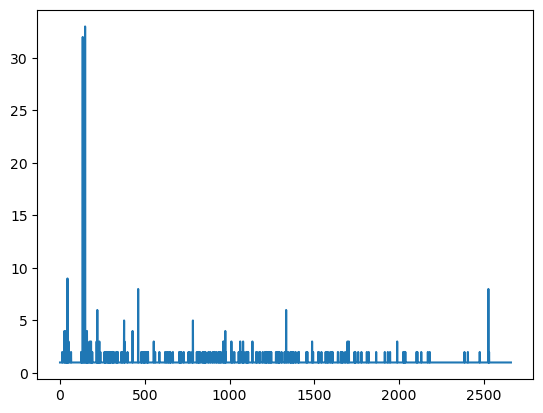

In [9]:
plt.plot(dfusers['tweets'])

### Create Scatter plot

In [16]:
dfusers.describe()

,tweets
count,2661.000000
mean,1.127020
std,0.971215
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,33.000000


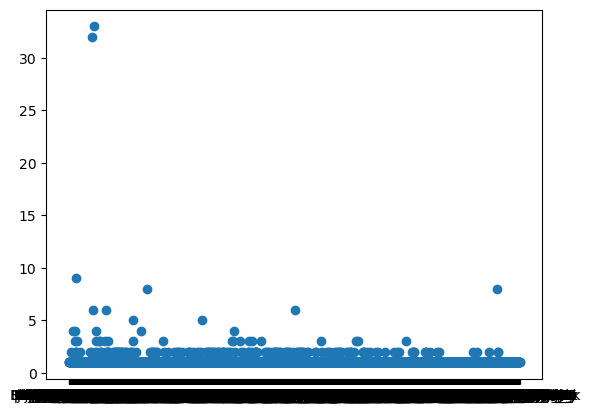

In [10]:
#plot scatter
plt.scatter(dfusers['user'],dfusers['tweets'])

### Create Histogram

(array([2.651e+03, 5.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([ 1. ,  4.2,  7.4, 10.6, 13.8, 17. , 20.2, 23.4, 26.6, 29.8, 33. ]),
 <BarContainer object of 10 artists>)

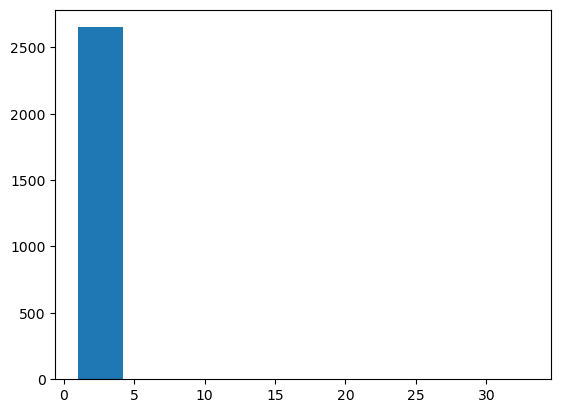

In [11]:
plt.hist(dfusers['tweets'])

From the above output most users tweet only 1 time
### Showing the User with most Tweets about Ukraine

In [12]:
# show most tweeting users
dfusers[dfusers['tweets']>1].max()

user      zsoozska
tweets          33
dtype: object